In [25]:
import pandas as pd

DIV = pd.read_excel (r'/Users/joezhou/Downloads/ALL_Div.xlsx') 

DIV12 = DIV.loc[(DIV['Date'] >= pd.to_datetime('now')- pd.DateOffset(months=12))
                    & (DIV['Date'] < pd.to_datetime('now'))]

#create a baselist for adding on the feature engineered variables
TICKER_LIST = DIV['TickName'].drop_duplicates().reset_index(drop=True)


In [26]:
# Calculate volatility features
DIV_MEDIAN = DIV.groupby("TickName")["Dividends"].median()
DIV_STD = DIV.groupby("TickName")["Dividends"].std()
DIV_MIN = DIV.groupby("TickName")["Dividends"].min()
DIV_MAX = DIV.groupby("TickName")["Dividends"].max()

TICKER_LIST_ADDED = pd.merge(TICKER_LIST,DIV_MEDIAN,on='TickName').rename(columns={'Dividends': 'Dividends_Median'})
TICKER_LIST_ADDED = pd.merge(TICKER_LIST_ADDED,DIV_STD,on='TickName').rename(columns={'Dividends': 'Dividends_Std'})
TICKER_LIST_ADDED = pd.merge(TICKER_LIST_ADDED,DIV_MIN,on='TickName').rename(columns={'Dividends': 'Dividends_Min'})
TICKER_LIST_ADDED = pd.merge(TICKER_LIST_ADDED,DIV_MAX,on='TickName').rename(columns={'Dividends': 'Dividends_Max'})


In [27]:
#Note: need to loop this later on for 3mth, 6mth, 12mths and 24mths, or some stochastic process

DIV12_MEDIAN = DIV12.groupby("TickName")["Dividends"].median()
DIV12_STD = DIV12.groupby("TickName")["Dividends"].std()
DIV12_MIN = DIV12.groupby("TickName")["Dividends"].min()
DIV12_MAX = DIV12.groupby("TickName")["Dividends"].max()

TICKER_LIST_ADDED = pd.merge(TICKER_LIST_ADDED,DIV12_MEDIAN,on='TickName').rename(columns={'Dividends': 'Dividends_Median_12mths'})
TICKER_LIST_ADDED = pd.merge(TICKER_LIST_ADDED,DIV12_STD,on='TickName').rename(columns={'Dividends': 'Dividends_Std_12mths'})
TICKER_LIST_ADDED = pd.merge(TICKER_LIST_ADDED,DIV12_MIN,on='TickName').rename(columns={'Dividends': 'Dividends_Min_12mths'})
TICKER_LIST_ADDED = pd.merge(TICKER_LIST_ADDED,DIV12_MAX,on='TickName').rename(columns={'Dividends': 'Dividends_Max_12mths'})


<AxesSubplot:xlabel='Dividends_Median_12mths', ylabel='Dividends_Median'>

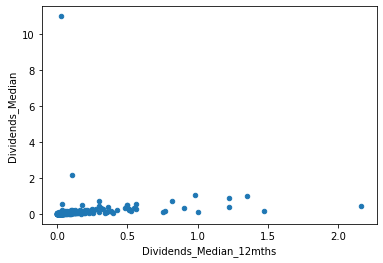

In [28]:
import matplotlib.pyplot as plt

# TICKER_LIST_ADDED.plot('Dividends_Median','Dividends_Std',kind = 'scatter')
# TICKER_LIST_ADDED.plot('Dividends_Min','Dividends_Max',kind = 'scatter')
# TICKER_LIST_ADDED.plot('Dividends_Min','Dividends_Median',kind = 'scatter')
TICKER_LIST_ADDED.plot('Dividends_Median_12mths','Dividends_Median',kind = 'scatter')



In [29]:
TICKER_LIST_ADDED.to_excel('/Users/joezhou/Downloads/ALL_Div_FEATURES.xlsx')  
